# About the Data

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. The dataset provides features the houses have and the price at which they were sold. I will go through data exploration to identify the important features and to explore the correlation between features. After that I apply data normalization between variables and apply feature engineering. This dataset is available at Kaggle.

id - Unique ID for each home sold 

date - Date of the home sale 

price - Price of each home sold 

bedrooms - Number of bedrooms 

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower 

sqft_living - Square footage of the apartments interior living space 

sqft_lot - Square footage of the land space 

floors - Number of floors 

waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not 

view - An index from 0 to 4 of how good the view of the property was 

condition - An index from 1 to 5 on the condition of the apartment, 

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design. 

sqft_above - The square footage of the interior housing space that is above ground level 

sqft_basement - The square footage of the interior housing space that is below ground level 

yr_built - The year the house was initially built 

yr_renovated - The year of the house’s last renovation 

zipcode - What zipcode area the house is in 

lat - Lattitude 

long - Longitude 

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors 

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from matplotlib.mlab import PCA as mlabPCA
from sklearn.decomposition import PCA 

%matplotlib inline

In [3]:
house_data = pd.read_csv('kc_house_data.csv')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [331]:
house_data.shape

(21613, 21)

This dataset has contain 21613 observations (rows) and 21 variables(columns.)

In [332]:
house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [333]:
house_data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Here the date column is an object type. We need to change it to Datetime

# Data Cleaning

We will correct some of the inconsistencies in the data:

Data Type of house sold date will be changed to DateTime.

In [4]:
house_data['date'] = pd.to_datetime(house_data['date']).dt.date.astype('datetime64[ns]')

In [335]:
house_data.date.describe()

count                   21613
unique                    372
top       2014-06-23 00:00:00
freq                      142
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: date, dtype: object

Here we see that, the dataset contains information from May 2014 to May 2015.

In [5]:
house_data['year_sold'] = house_data['date'].dt.year
house_data['month_sold'] = house_data['date'].dt.strftime("%b") 

Since we have added year and month column separately, we can drop the date column from our data.

In [6]:
house_data.drop('date', axis = 1, inplace= True )

In [340]:
house_data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,Oct
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,Dec
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,Feb
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,Dec
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,Feb


Ideally the sold year should be on or after the built year. 
Below we will check if there are any records where there is an inconsistency. 
In case the built year is after the sold year we will consider it as an error and Remove those columns.

In [6]:
house_data.loc[house_data.year_sold < house_data.yr_built]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold
1763,1832100030,597326.0,4,4.00,3570,8250,2.0,0,0,3,...,710,2015,0,98040,47.5784,-122.226,2230,10000,2014,Jun
2687,3076500830,385195.0,1,1.00,710,6000,1.5,0,0,3,...,0,2015,0,98144,47.5756,-122.316,1440,4800,2014,Oct
7526,9520900210,614285.0,5,2.75,2730,6401,2.0,0,0,3,...,0,2015,0,98072,47.7685,-122.160,2520,6126,2014,Dec
8039,1250200495,455000.0,2,1.50,1200,1259,2.0,0,0,3,...,200,2015,0,98144,47.6001,-122.298,1320,1852,2014,Jun
14489,2770601530,500000.0,2,2.25,1570,1269,2.0,0,0,3,...,290,2015,0,98199,47.6514,-122.385,1570,6000,2014,Aug
17098,9126100346,350000.0,3,2.00,1380,3600,3.0,0,0,3,...,0,2015,0,98122,47.6074,-122.305,1480,3600,2014,Jun
19805,9126100765,455000.0,3,1.75,1320,1014,3.0,0,0,3,...,0,2015,0,98122,47.6047,-122.305,1380,1495,2014,Aug
20770,9310300160,357000.0,5,2.50,2990,9240,2.0,0,0,3,...,0,2015,0,98133,47.7384,-122.348,1970,18110,2014,Aug
20852,1257201420,595000.0,4,3.25,3730,4560,2.0,0,0,3,...,970,2015,0,98103,47.6725,-122.330,1800,4560,2014,Jul
20963,6058600220,230000.0,3,1.50,1040,1264,2.0,0,0,3,...,140,2015,0,98144,47.5951,-122.301,1350,3000,2014,Jul


In [7]:
house_data = house_data.loc[house_data.year_sold >= house_data.yr_built]

In [72]:
house_data[house_data.bedrooms == 33]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold
15870,2402100895,640000.0,33,1.75,1620,6000,1.0,0,0,5,...,580,1947,0,98103,47.6878,-122.331,1330,4700,2014,Jun


This row has 33 bedrooms with sqft living area of just 1620. Looks like a typo error. we can exclude this row.

In [8]:
house_data = house_data[house_data.bedrooms != 33]

In [77]:
house_data.shape

(21600, 22)

Let's check if we have any missing values in our dataset.

In [78]:
house_data.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year_sold        0
month_sold       0
dtype: int64

We dont have any missing data in this dataset.

# Understanding distribution of price

In [79]:
house_data.price.describe().apply(lambda x: '%.3f' % x)

count      21600.000
mean      540124.870
std       367223.129
min        75000.000
25%       321500.000
50%       450000.000
75%       645000.000
max      7700000.000
Name: price, dtype: object

The Average price for houses is 540124.870 with minimum price as 75000 and maximum price as 7700000. 
Let's visualize the histogram for price.

In [9]:
norm = np.random.normal(0, 1,len(house_data))
norm.sort()

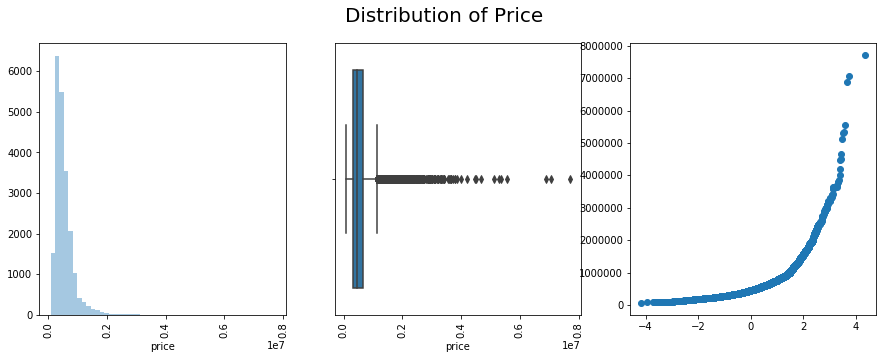

In [81]:
plt.figure(figsize=(15,5))
plt.suptitle('Distribution of Price', fontsize=20)
plt.subplot(1,3,1)
sns.distplot( house_data['price'], kde= False)
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.boxplot(house_data['price'])
plt.xticks(rotation=90)
plt.subplot(1,3,3)
price = sorted(house_data['price'])
plt.plot(norm, price,"o") 

plt.show()

The price shows positive skewness, deviates from the normal distribution and shows peakedness. Let's take a look at the skewness and kurtosis in numbers:

In [82]:
print("Skewness: %f" % house_data['price'].skew())
print("Kurtosis: %f" % house_data['price'].kurt())

Skewness: 4.023080
Kurtosis: 34.567243


I see that in this dataset, the sqft_living is total of sqft_above and sqft_basement. Let's see if this is true or not.

In [89]:
house_data[house_data.sqft_living != (house_data.sqft_above + house_data.sqft_basement)].shape


(0, 22)

Since the sqft_living is total of sqft_above and sqft_basement, we can leave the sqft_above and sqft_basement column from the correlation analysis.
The waterfront is a categorical variable and 'view','condition','grade' are rated variables. So we will check the correlation matrix for them separately to make the plot little clear.

In our dataset, price is the outcome variable. So let's check how other variables are related to price

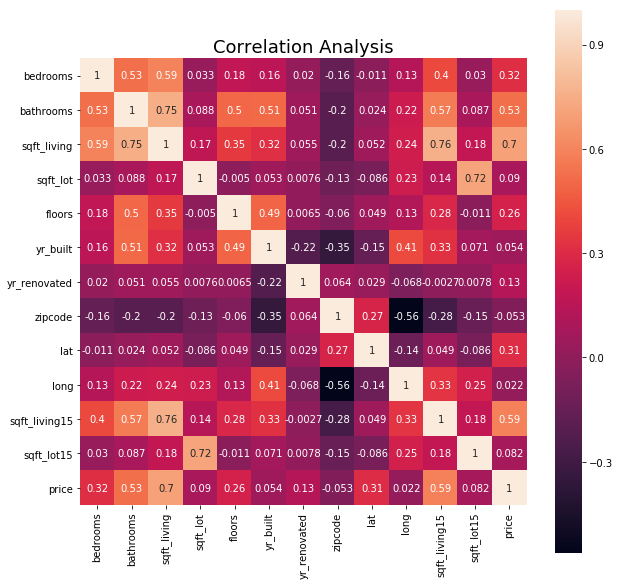

In [161]:
numerical_vars = [ 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot','floors', 'yr_built','yr_renovated','zipcode','lat','long' ,'sqft_living15','sqft_lot15', 'price']
plt.figure(figsize=(10, 10))
plt.title('Correlation Analysis', fontsize=18)
sns.heatmap( house_data[numerical_vars].corr(), annot=True , square=True)

#.00-.19 “very weak”  .20-.39 “weak”  .40-.59 “moderate”  .60-.79 “strong”  .80-1.0 “very strong”

As  per the correlation matrix, 

the sqft_living variable is strongly correlated to price.

the variable bathrooms and sqft_living15 are moderately correlated to price.

the variables bedrooms and lat are weakly correlated to price.

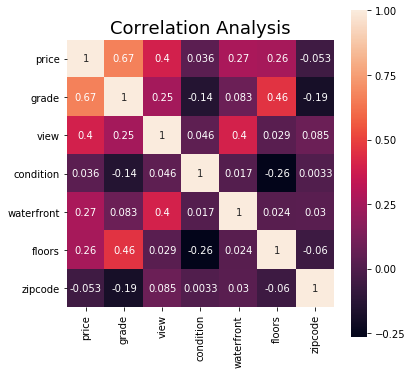

In [168]:
other_vars = ['price', 'grade', 'view','condition','waterfront','floors']
plt.figure(figsize=(6, 6))
plt.title('Correlation Analysis', fontsize=18)
sns.heatmap( house_data[other_vars].corr(), annot=True , square=True)

The grade of the house is highly correlated with the price and view of the house is moderately correlated with the price.
floor and waterfront are weakly correlated with price.

Let's analyse the variable which are strongly or moderately correlated to price.

# Let's analyse the distribution of sqft_living

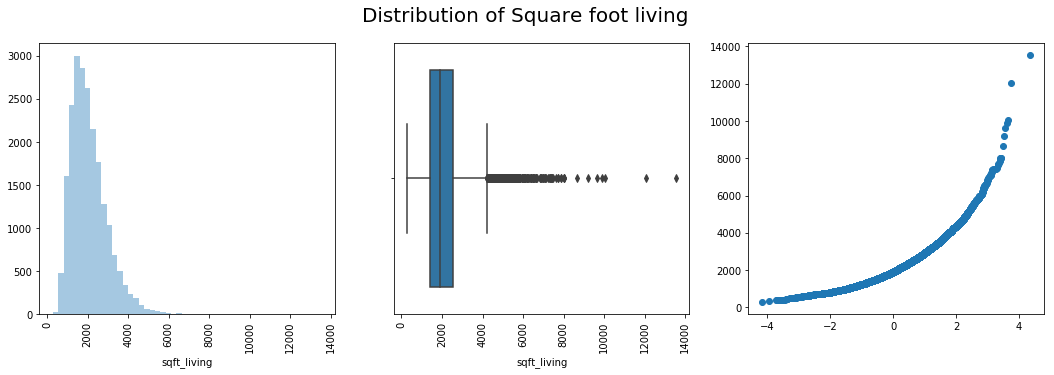

In [96]:
plt.figure(figsize=(18,5))
plt.suptitle('Distribution of Square foot living', fontsize=20)
plt.subplot(1,3,1)
sns.distplot( house_data['sqft_living'], kde= False)
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.boxplot(house_data['sqft_living'])
plt.xticks(rotation=90)
plt.subplot(1,3,3)
price = sorted(house_data['sqft_living'])
plt.plot(norm, price,"o") 

plt.show()


Looks like, the Square foot living does not follow a normal distribution. We will handle that later by taking transformation.

# Categorical with Continuous variable

In [103]:
df = house_data.loc[:,['grade', 'view','bathrooms','price']]
df_long = pd.melt(df, id_vars=['price'])
df_grp = df_long.groupby(['variable','value'])['price'].mean().reset_index()

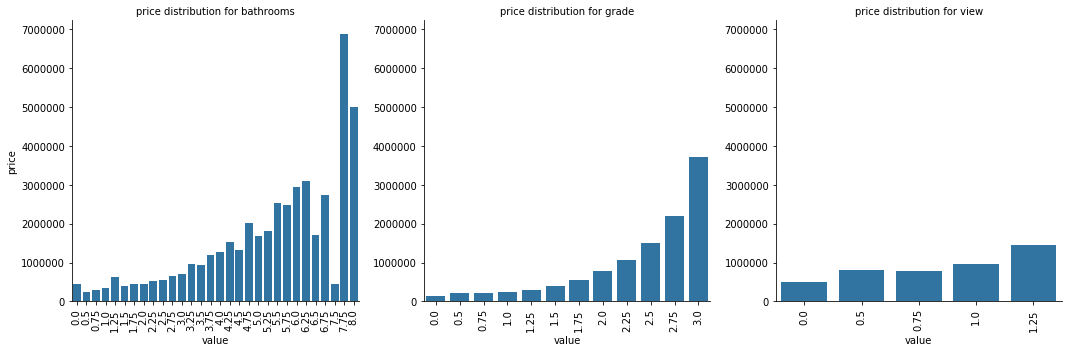

In [109]:
g = sns.FacetGrid(df_grp, col="variable", size=5, sharex= False)
g = g.map(sns.barplot, "value", "price" )
g.set_titles( col_template = 'price distribution for {col_name}')
g.set_xticklabels(rotation=90)
plt.tight_layout()
plt.show()

The price is increasing steadily with grade. This goes with the correlation matrix, where we saw grade is strongly correlated with price. price increases with number of bathrooms but with few variations. houses having better View are sold at better prices but not so significant.  

Let's analyse the variables like waterfront and floor which are weakly correlated to the price of the house.

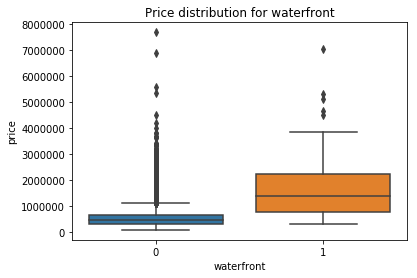

In [100]:
plt.title('Price distribution for waterfront')
sns.boxplot(x='waterfront', y='price', data=house_data)
plt.show()

Houses having a waterfront are sold at better price than house without a waterfront.

In [113]:
house_data.floors.unique()

array([ 1. ,  2. ,  1.5,  3. ,  2.5,  3.5])

The dataset has floors as 1.5, 2.5 etc. Not sure if it is a typo error or some different meaning. So not considering to analyse this column. Anyway, this variable is weakly correlated to price. So not considering this as important.

# Feature engineering


Creating a data frame to hold our features. We will consider the variables which are strongly and moderately correlated to price.

In [10]:
features = house_data.loc[:,['price','sqft_living','grade','bathrooms','view']]
features.head()

,price,sqft_living,grade,bathrooms,view
0,221900.0,1180,7,1.00,0
1,538000.0,2570,7,2.25,0
2,180000.0,770,6,1.00,0
3,604000.0,1960,7,3.00,0
4,510000.0,1680,8,2.00,0


# Feature 1:

Let's normalise the price by taking a log transformation of this. 

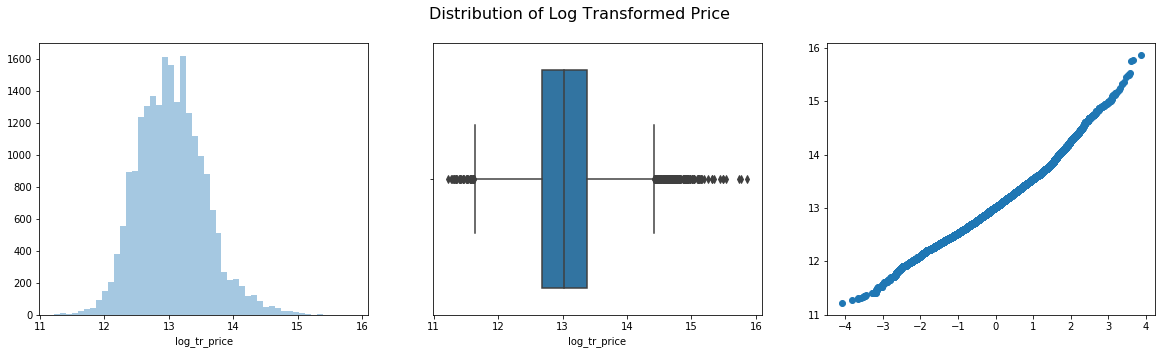

In [11]:
features['log_tr_price'] = np.log(features['price'])
plt.figure(figsize=(20,5))
plt.suptitle('Distribution of Log Transformed Price', fontsize=16)
plt.subplot(1,3,1)
sns.distplot(features['log_tr_price'], kde= False)
plt.subplot(1,3,2)
sns.boxplot(features['log_tr_price'])
plt.subplot(1,3,3)
plt.plot(norm, sorted(features['log_tr_price']),"o") 

plt.show()

After taking the log transformation, the price now follows a normal distribution.

# Feature 2:

Let's normalise the sqft_living by taking a log transformation of this. Then we will analyse its relation with log transfomed price.

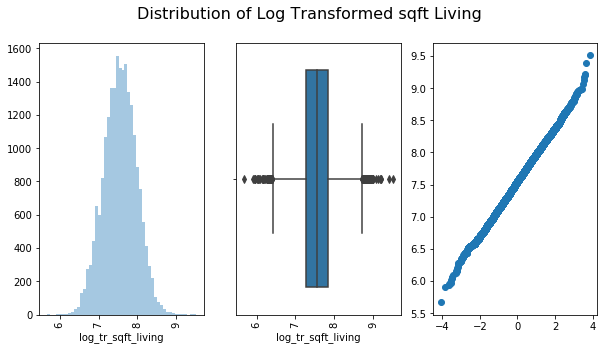

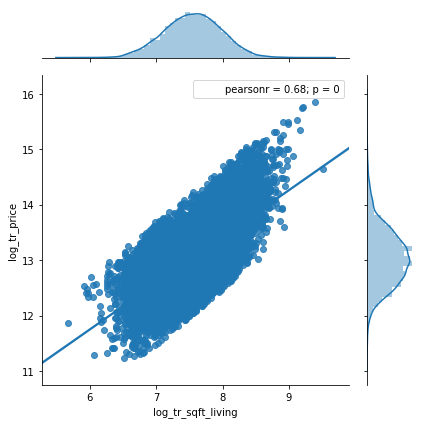

In [12]:
features['log_tr_sqft_living'] = np.log(features['sqft_living'])
plt.figure(figsize=(10,5))
plt.suptitle('Distribution of Log Transformed sqft Living', fontsize=16)
plt.subplot(1,3,1)
sns.distplot( features['log_tr_sqft_living'], kde= False)
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.boxplot(features['log_tr_sqft_living'])
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sqft_living = sorted(features['log_tr_sqft_living'])
plt.plot(norm, sqft_living,"o") 

sns.jointplot(x="log_tr_sqft_living", y="log_tr_price", data=features, kind = 'reg')
plt.tight_layout()
plt.show()


Now there is a nice linear relationship between the features log transformed sqft living and log transformed price.

# Feature 3:

Let's analyse the year in which the house is built. It is not a continuous variable and if we use it as a categorical variable, it will create several categories. And there might not have much information about the categories. But we can calcuate the age of the house, by calculating the difference between the year it is sold and the year it is built.

In [13]:
features['age'] = house_data['year_sold'] - house_data['yr_built']
house_data['age'] = house_data['year_sold'] - house_data['yr_built']

In [134]:
print(features['age'].unique())

[ 59  63  82  49  28  13  19  52  55  12  50  72  87  37 115  36  20  98
  93  46  67  29  73  99 105  66  10  11   9  85  33  84  81 110  18  14
  30   0  92  62  64  34  88   6  24  60  41  35  89  25  43  58  74  22
  51  53   8  26  75  68  48  39 104  31 114   4  69  65  90  27 101  47
  54 109   7  61  15  38  16 113  21  94  45 100 111  96  97  86 103  78
  77  76 107  40  57 102  17  71   1  23  91  42  95   2  32   3  56  70
  44 112   5  80  83 106 108  79]


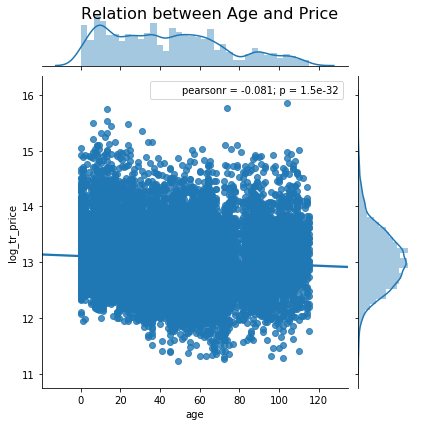

In [145]:
sns.jointplot(x="age", y="log_tr_price", data=features, kind = 'reg')
plt.suptitle('Relation between Age and Price', fontsize=16)

plt.show()

price is declining with the age of the house, but not greatly. 

# Feature 4:

Is the house renovated influences the price?

In [14]:
features['is_renovated'] = np.where(house_data.loc[:,'yr_renovated'] != 0 , 1, 0)

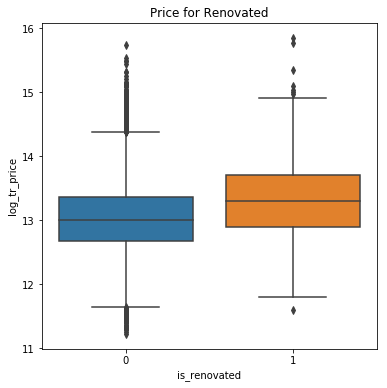

In [143]:
plt.figure(figsize= (6,6))
sns.boxplot(x= 'is_renovated', y= 'log_tr_price', data = features)
plt.title('Price for Renovated')
plt.show()

price increases if it is a renovated house, but not significantly.

# Feature 5

Let's analyse the trend of price per sqft living for the past months. We can get the price per sqft living by dividing the price by sqft_living. 

In [15]:
# price_sqft_living
features['price_sqft_living'] = house_data.price/house_data.sqft_living
house_data['price_sqft_living'] = house_data.price/house_data.sqft_living

In [150]:
features.head()

,price,sqft_living,grade,bathrooms,view,age,is_renovated,log_tr_price,log_tr_sqft_living,price_sqft_living
0,221900.0,1180,7,1.00,0,59,0,12.309982,7.073270,188.050847
1,538000.0,2570,7,2.25,0,63,1,13.195614,7.851661,209.338521
2,180000.0,770,6,1.00,0,82,0,12.100712,6.646391,233.766234
3,604000.0,1960,7,3.00,0,49,0,13.311329,7.580700,308.163265
4,510000.0,1680,8,2.00,0,28,0,13.142166,7.426549,303.571429


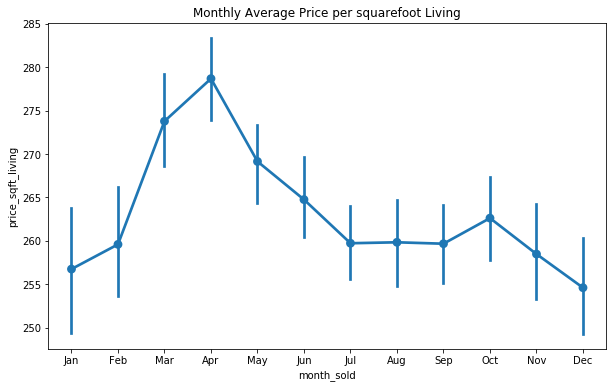

In [151]:
plt.figure(figsize=(10,6))

sns.pointplot(x= 'month_sold', y = 'price_sqft_living', data= house_data, 
              order= ['Jan', 'Feb','Mar','Apr','May','Jun', 'Jul','Aug','Sep','Oct','Nov','Dec'] )
plt.title('Monthly Average Price per squarefoot Living')
plt.show()

prices increase from January till April and then it started declining till September. Again it went up in October which again starts falling.

# Feature 6

How many bedrooms and how many bathrooms

In [16]:
features['bed_x_bath'] = house_data.bathrooms * house_data.bedrooms

# Feature 7

which year the house was built and it is in what condition when sold

In [17]:
features['yr_x_cond'] = house_data.yr_built * house_data.condition

# Feature 8

In [ ]:
which area was the house and how big is the lot size

In [18]:
features['lot_x_zip'] = house_data.sqft_lot * house_data.zipcode

# Feature 9

In [19]:
features['grade_x_beds'] = house_data.grade * house_data.bedrooms

In [20]:
features.columns

Index(['price', 'sqft_living', 'grade', 'bathrooms', 'view', 'log_tr_price',
       'log_tr_sqft_living', 'age', 'is_renovated', 'price_sqft_living',
       'bed_x_bath', 'yr_x_cond', 'lot_x_zip', 'grade_x_beds'],
      dtype='object')

In [21]:
features.drop(['price','sqft_living'], axis=1,inplace=True)

In [22]:
features.columns

Index(['grade', 'bathrooms', 'view', 'log_tr_price', 'log_tr_sqft_living',
       'age', 'is_renovated', 'price_sqft_living', 'bed_x_bath', 'yr_x_cond',
       'lot_x_zip', 'grade_x_beds'],
      dtype='object')

In [191]:
features.head()

,grade,bathrooms,view,age,is_renovated,log_tr_price,log_tr_sqft_living,price_sqft_living,age_x_cond,yr_x_cond,bed_x_bath,lot_x_zip,grade_x_beds
0,7,1.00,0,59,0,12.309982,7.073270,188.050847,118,5865,3.00,554705700,21
1,7,2.25,0,63,1,13.195614,7.851661,209.338521,126,5853,6.75,710621250,21
2,6,1.00,0,82,0,12.100712,6.646391,233.766234,164,5799,2.00,980280000,12
3,7,3.00,0,49,0,13.311329,7.580700,308.163265,0,9825,12.00,490680000,28
4,8,2.00,0,28,0,13.142166,7.426549,303.571429,56,5961,6.00,792437920,24


# PCA

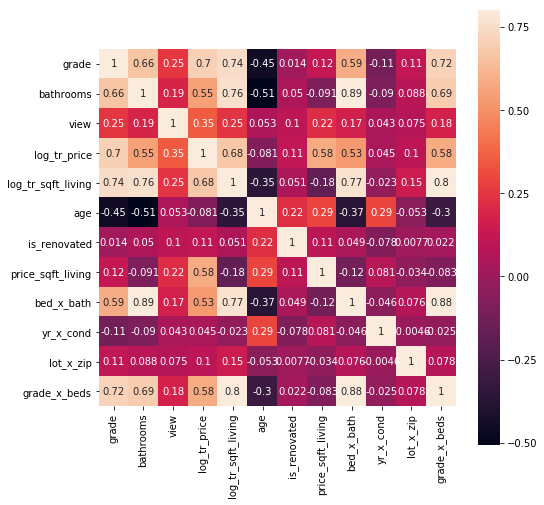

In [23]:
corrmat = features.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)
plt.show()

Let's reduce the number of features. Since Price will be our outcome variable, we won't include it in the dimension reduction analysis.

In [24]:
features_pca = features.loc[:,~features.columns.isin(['log_tr_price'])]
features_pca.shape

(21600, 11)

In [33]:
# normalize data

data_scaled = pd.DataFrame(preprocessing.scale(features_pca),columns = features_pca.columns) 
pca = PCA(n_components=5)
pca.fit_transform(data_scaled)
print (pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2', 'PC-3','PC-4','PC-5']))

         grade  bathrooms      view  log_tr_sqft_living       age  \
PC-1  0.397111   0.433481  0.124470            0.432023 -0.259727   
PC-2  0.111137  -0.013307  0.479317            0.056237  0.470864   
PC-3  0.072475   0.008120  0.074016           -0.086405 -0.135707   
PC-4  0.026880  -0.071356  0.180107            0.010876 -0.073390   
PC-5 -0.245795   0.031440 -0.295912            0.122808  0.292624   

      is_renovated  price_sqft_living  bed_x_bath  yr_x_cond  lot_x_zip  \
PC-1      0.009987          -0.062693    0.436612  -0.060512   0.071564   
PC-2      0.366211           0.552321    0.028403   0.291794   0.040059   
PC-3      0.532850           0.137594   -0.080704  -0.800444  -0.032469   
PC-4     -0.119704          -0.034749   -0.125131  -0.067651   0.953676   
PC-5      0.629171          -0.503970    0.149335   0.184891   0.189483   

      grade_x_beds  
PC-1      0.425863  
PC-2      0.078273  
PC-3     -0.110371  
PC-4     -0.104759  
PC-5      0.089949  


C:\Users\gyans\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


for Principal component 1: bed_x_bath contributed higher.    
for Principal component 2: price_sqft_living contributed higher.   
for Principal component 3: yr_x_cond contributed higher.   
for Principal component 4: lot_x_zip contributed higher.   
for Principal component 5: is_renovated contributed higher.  

In [34]:
eig_vals = pca.explained_variance_
eig_vecs = pca.components_
print(eig_vals)
print()
ratios = pca.explained_variance_ratio_
print(ratios)
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print()
print(var1)

[ 4.344204    1.54128445  1.08425787  0.99871     0.97225519]

[ 0.39490935  0.14011028  0.09856433  0.09078762  0.08838274]

[ 39.49  53.5   63.36  72.44  81.28]


Explained Variance
The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can reduce dimension, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 39% of the variance and the second principal component contains 14% of the variance and so on. All-together, the five components contain 81% of the information.